# Lab 8 - K-Means Clustering

As per Vanderplas (2016), the k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

K-Means (Clustering) is a type of an unsupervised learning algorithm. Unlike supervised learning algorithms, the training dataset does not contain the class labels (i.e. we do not have the ground truth label/output for each sample).

| |
|-|
|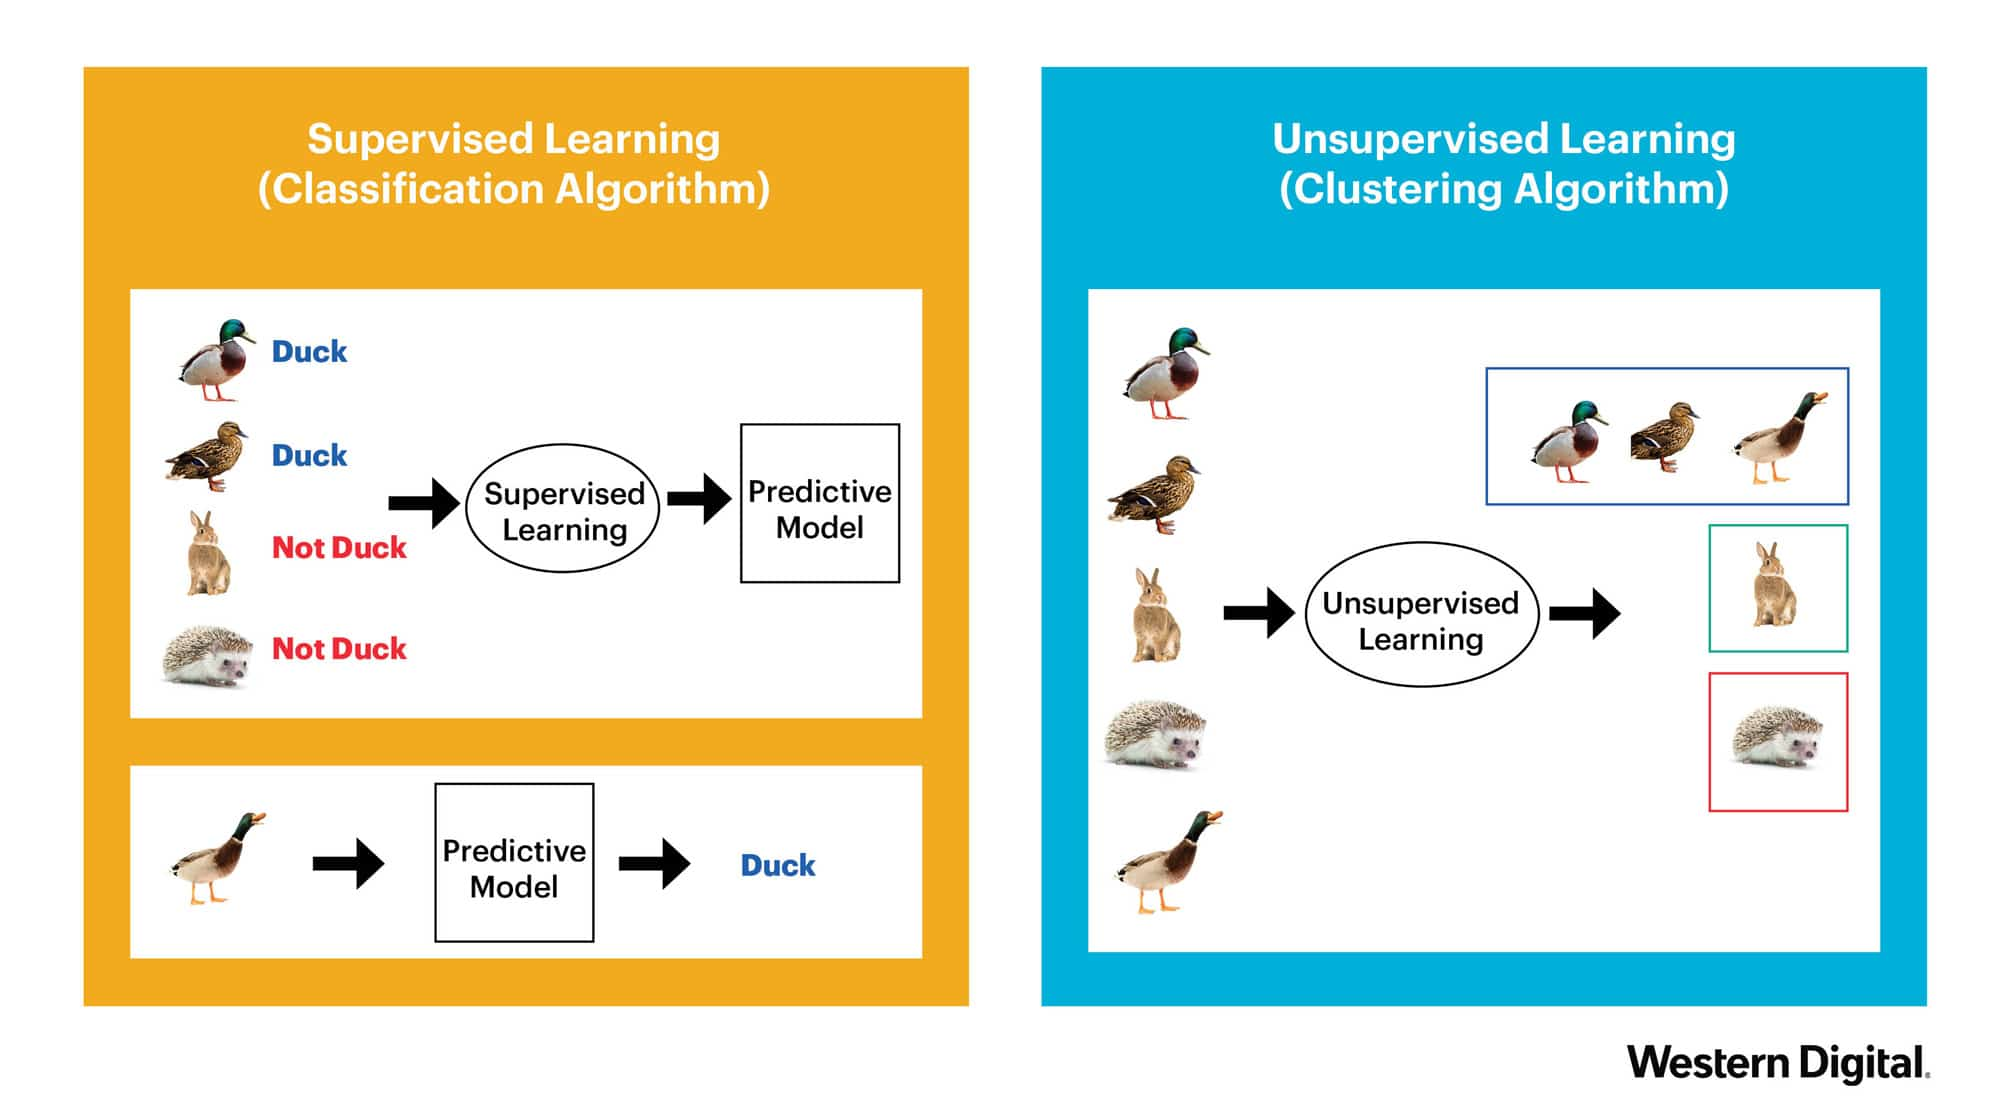|
|Image Credit: Western Digital|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

**Dataset Description**: This is a fictional dataset created for learning basic customer segmentation concepts using clustering. Spending Score is a value from 1-100 assigned based on customers' behavior and purchasing data. We, as data scientists, would like to come up with customer segments that the marketing team can target and plan their strategy with.

In [2]:
try:
    df = pd.read_csv('../data/mall_customers.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Inspection and EDA

In [3]:
# Renaming the column names for easier column access
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Score']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Quick check for any (detected) missing values

In [4]:
# Are there any null values in any of the columns?
df.isnull().any().any()

False

In [5]:
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


We'll drop the ID column since it's not useful for data analysis or modelling. Unique identifier columns are normally used for either joining/merging datasets, grouping by / aggregation (e.g. transaction dataset with recurring customers), or for identifying duplicate data. They should not be used as part of the features for modelling.

In [6]:
df = df.drop('CustomerID', axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


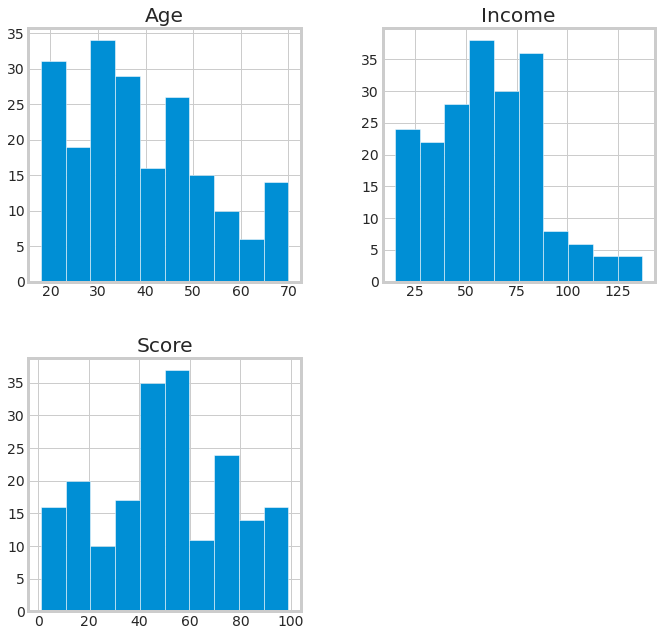

In [7]:
df.hist(figsize=(10,10));

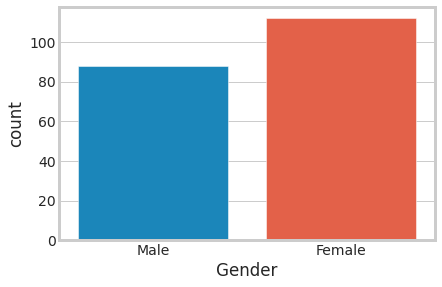

In [8]:
sns.countplot(x=df['Gender']);

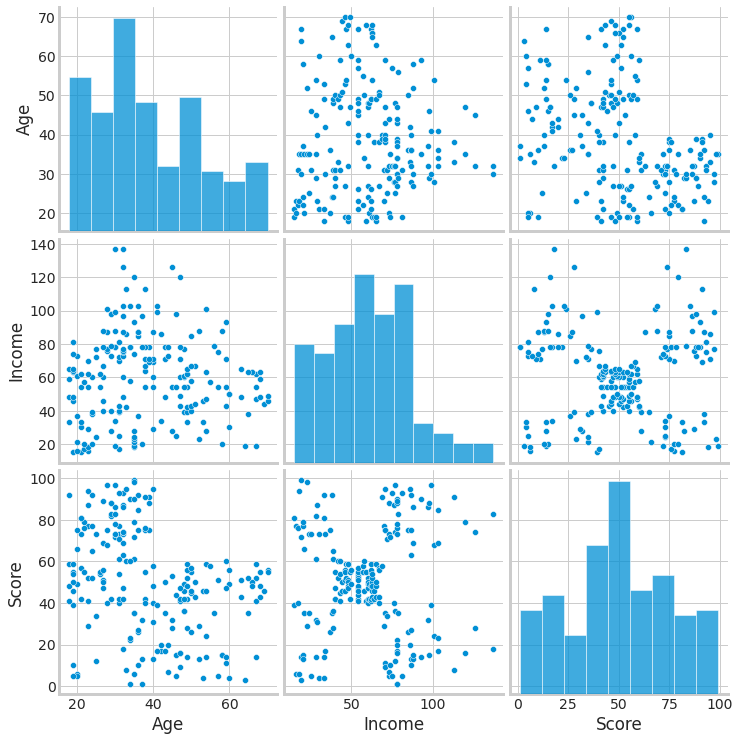

In [9]:
sns.pairplot(df, height=3.5);

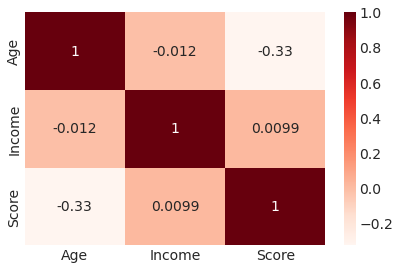

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='Reds');

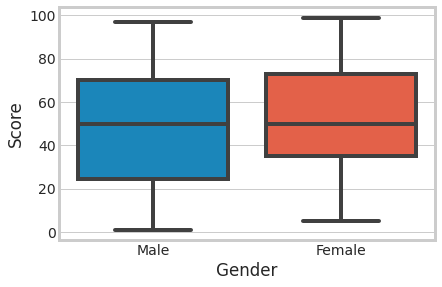

In [11]:
sns.boxplot(x='Gender', y='Score', data=df);

For the sake of easy visualization, we'll pick just two columns to cluster: spending score and income. To clarify, clustering algorithms can work with many columns as well.

In [12]:
X = df[['Income', 'Score']].copy()
X.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The elbow method is one heuristic for choosing `k` or the number of clusters the K-Means algorithm should form. At a certain point, increasing the number of clusters causes diminishing returns in clustering performance beacuse the clusters are already well-grouped. So, the number of clusters at which the curve bends, i.e. its 'elbow point', is chosen.

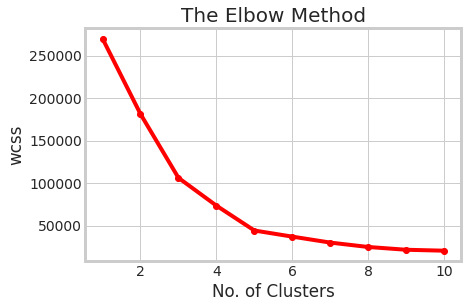

In [13]:
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally
# From 1 till 10
# 10 was chosen as the upper limit since there doesn't seem to be many clusters present in the data
# as per the pairplot
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

## Clustering

Now that we've decided on which `k` to use, we can apply the K-Means algorithm to our data to cluster them into `k` groups.

In [14]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

## Cluster Interpretation

In [15]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels

# You can avoid pandas' output truncation by setting the four options below.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

Age                                                       Income  \
        count       mean        std   min    25%   50%    75%   max  count   
cluster                                                                      
0        35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   35.0   
1        81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   81.0   
2        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   39.0   
3        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   22.0   
4        23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   23.0   

                                                               Score  \
              mean        std   min    25%   50%    75%    max count   
cluster                                                                
0        88.200000  16.399067  70.0  77.50  85.0  97.50  137.0  35.0   
1        55.296296   8.988109  39.0  48.00  54.0  62.00   76.0  81.0   
2        86.538462  16.312485  69.0  75.50  79.0  95.00  137.0  39.0   
3        25.727273   7.566731  15.0  19.25  24.5  32.25   39.0  22.0   
4        26.304348   7.893811  15.0  19.50  25.0  33.00   39.0  23.0   

                                                              
              mean        std   min   25%   50%    75%   max  
cluster                                                       
0        17.114286   9.952154   1.0  10.0  16.0  23.50  39.0  
1        49.518519   6.530909  34.0  44.0  50.0  55.00  61.0  
2        82.128205   9.364489  63.0  74.5  83.0  90.00  97.0  
3        79.363636  10.504174  61.0  73.0  77.0  85.75  99.0  
4        20.913043  13.017167   3.0   9.5  17.0  33.50  40.0

In [16]:
df.groupby('cluster').describe(include='object')

Gender                    
         count unique     top freq
cluster                           
0           35      2    Male   19
1           81      2  Female   48
2           39      2  Female   21
3           22      2  Female   13
4           23      2  Female   14

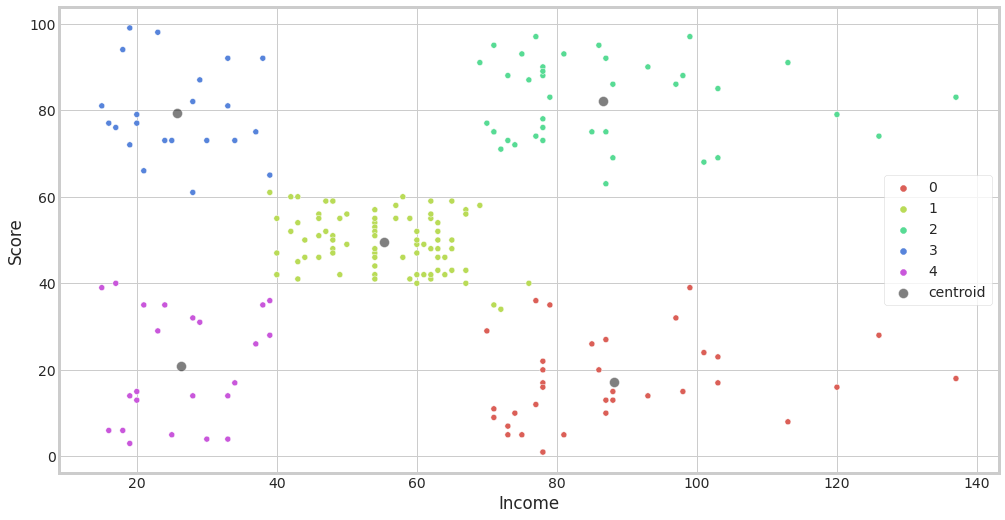

In [17]:
# Since we only have two columns, we can easily plot/represent the clusters on a single scatterplot
# If we had more columns, we can consider using seaborn's pairplot (to a pair-wise scatterplot of every column)
# Or a box/violin plot, to look at the data distribution of each cluster with respect within each column/feature
plt.figure(figsize=(15,8))
sns.scatterplot(x='Income', y='Score', hue='cluster', data=df, palette=sns.color_palette('hls', 5));

# Since we're dealing with just two columns, we'll also add the centroids
# to the plot to visually demonstrate the algorithm's cluster centers
centroids = km.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black', alpha=0.5, s=100);

/home/hazem/.local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/hazem/.local/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


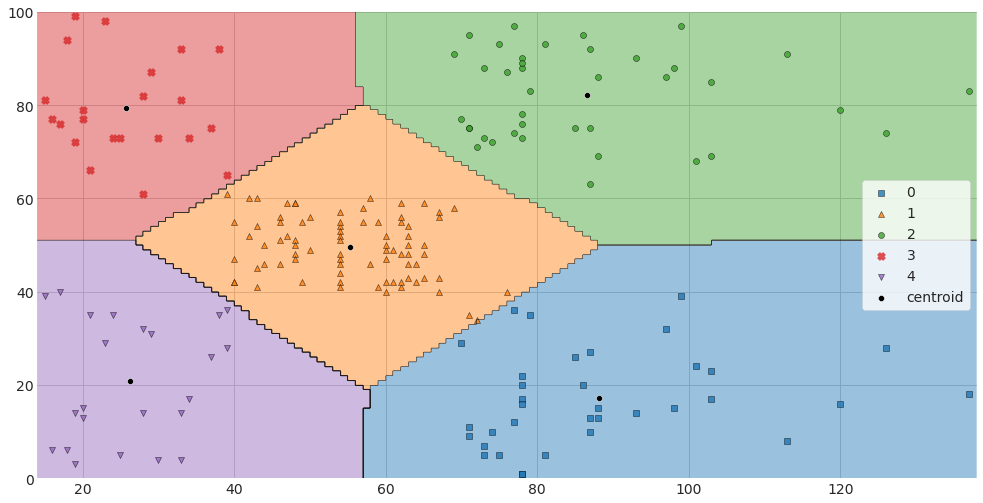

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15,8))
plot_decision_regions(X=df[['Income', 'Score']].to_numpy(), y=df['cluster'].to_numpy(), clf=km, legend=2);
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black');
# plt.title(lab)

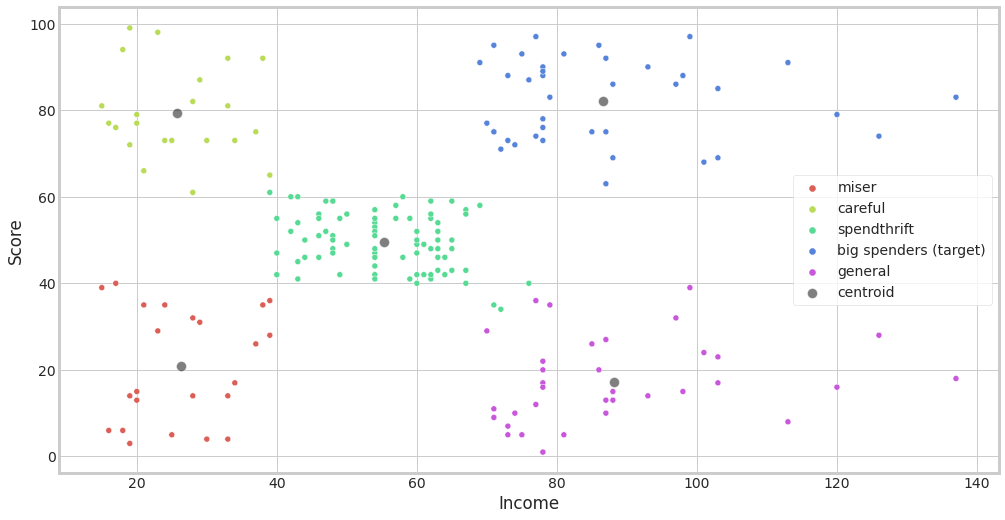

In [19]:
# Optionally, replace the cluster labels with meaningful names
df.loc[df['cluster'] == 0, 'cluster'] = 'general'
df.loc[df['cluster'] == 1, 'cluster'] = 'spendthrift'
df.loc[df['cluster'] == 2, 'cluster'] = 'big spenders (target)'
df.loc[df['cluster'] == 3, 'cluster'] = 'careful'
df.loc[df['cluster'] == 4, 'cluster'] = 'miser'

plt.figure(figsize=(15,8))
# Unfortunately, colors are not the same each run without manual assignment of a color to each class
sns.scatterplot(x='Income', y='Score', hue='cluster', data=df, palette=sns.color_palette('hls', 5));
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black', alpha=0.5, s=100);

## Limitations of K-Means

### The number of clusters must be selected beforehand

K-Means cannot learn the number of clusters from the data. Choosing a suitable number of clusters is a common challenge that does not have a clear-cut answer, but there exist several heuristics to assist with this problem. Namely, the elbow method (shown above), and [silhoutte analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) (outside the scope of the course).

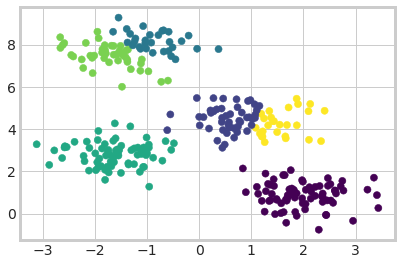

In [20]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### k-means is limited to linear cluster boundaries

If the clusters have complicated geometries such as the one below, K-Means will often be ineffective, because its cluster boundaries are always linear.

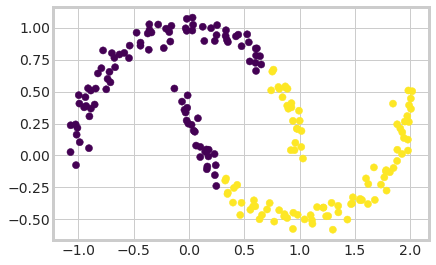

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

A density-based algorithm like DBSCAN would perform better in such cases.

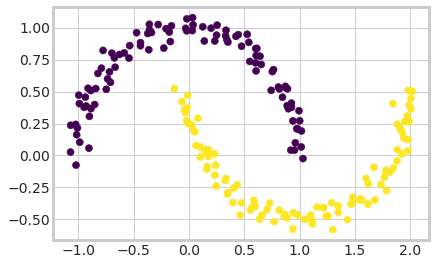

In [22]:
from sklearn.cluster import DBSCAN
X, y = make_moons(200, noise=.05, random_state=0)

labels = DBSCAN(eps=0.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Extra: K-Means for Color Compression

Based on Color Quantization using K-Means from https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html and https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Reducing 96,615 unique colors to just 64 unique colors, while preserving the overall appearance quality (a compression factor of almost a million!). There are certainly better approaches for image compression, but this demonstrates the power of unsupervised learning algorithms like K-Means when used in creative ways.

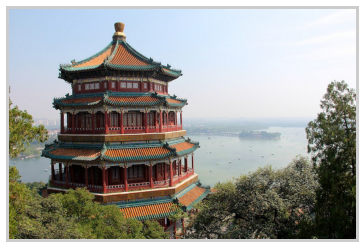

In [23]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [24]:
china.shape

(427, 640, 3)

In [25]:
data = china / 255.0 # use 0...1 scale
h, w = china.shape[0], china.shape[1]
data = data.reshape(w*h, 3) # reshape to scikit-learns expected n_samples x n_features
data.shape

(273280, 3)

In [26]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle

# use a small subset of the data to reduce the computation time
data_subset = shuffle(data, random_state=0)[:1000]

kmeans = MiniBatchKMeans(64)
kmeans.fit(data_subset)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

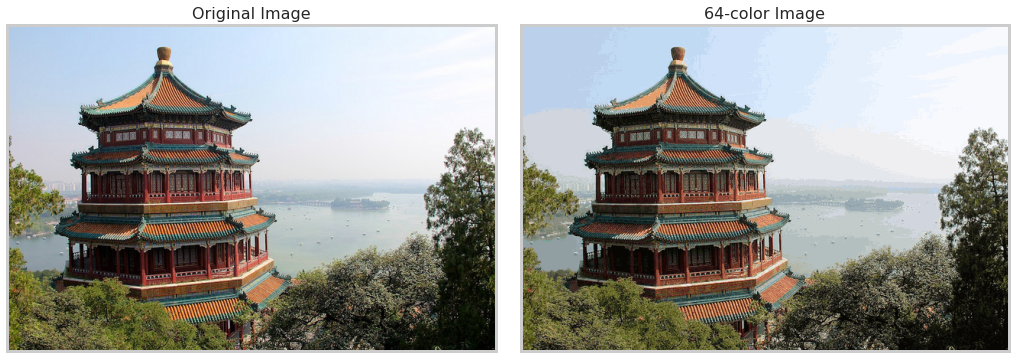

In [27]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('64-color Image', size=16);

## References

- Vanderplas, J. (2016). Python Data Science Handbook. Sebastopol, CA: Oreilly & Associates Inc.
- Clustering — scikit-learn documentation. (2020, December 22). Retrieved from https://scikit-learn.org/stable/modules/clustering.html
- \[Dataset Source\]: Udemy's Machine Learning A-Z Course.

## Acknowledgement

This notebook is based on the work by Rohan Sharma's [Mall Customers Clustering Analysis](https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis) on Kaggle.